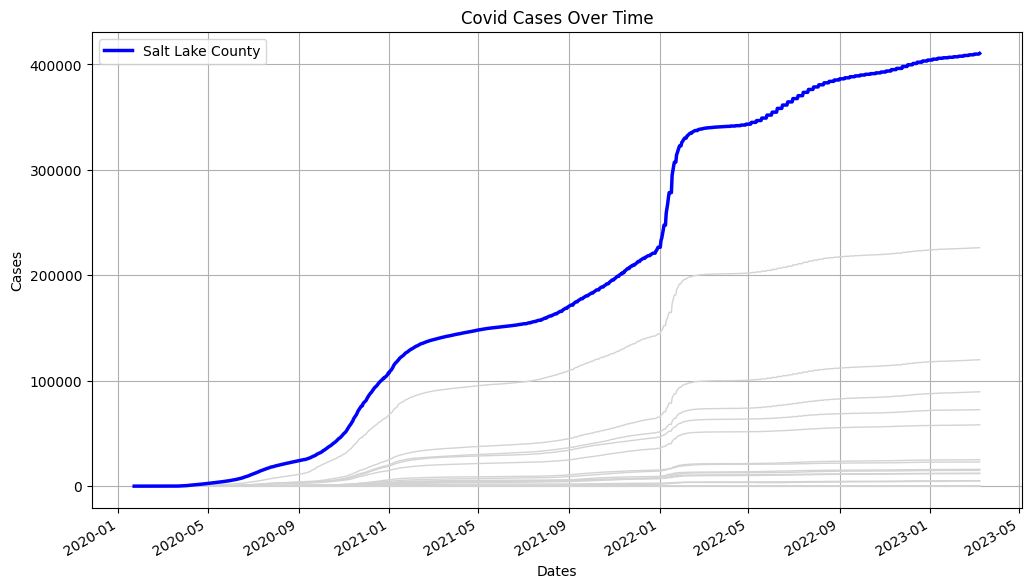

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

#filter for Utah
utah_df = covid_df[covid_df['Province_State'] == 'Utah']

#extract the date columns starting at column index 11
date_cols = utah_df.columns[11:]

#transpose so dates become index
utah_ts = utah_df[date_cols].T
utah_ts.index = pd.to_datetime(utah_ts.index, format = "%m/%d/%y")

#pick a county to highlight
highlight = 'Salt Lake'
highlight_series = utah_ts.loc[:, utah_df['Admin2'] == highlight]

plt.figure(figsize=(12, 7))

#plot all counties in grey
for col in utah_ts.columns:
    plt.plot(utah_ts.index, utah_ts[col], color = 'lightgrey', linewidth = 1)

#plot highlighted county
plt.plot(
    utah_ts.index,
    highlight_series.iloc[:, 0],
    color = 'Blue',
    linewidth = 2.5,
    label = f"{highlight} County"
)

plt.title("Covid Cases Over Time")
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()

plt.show()

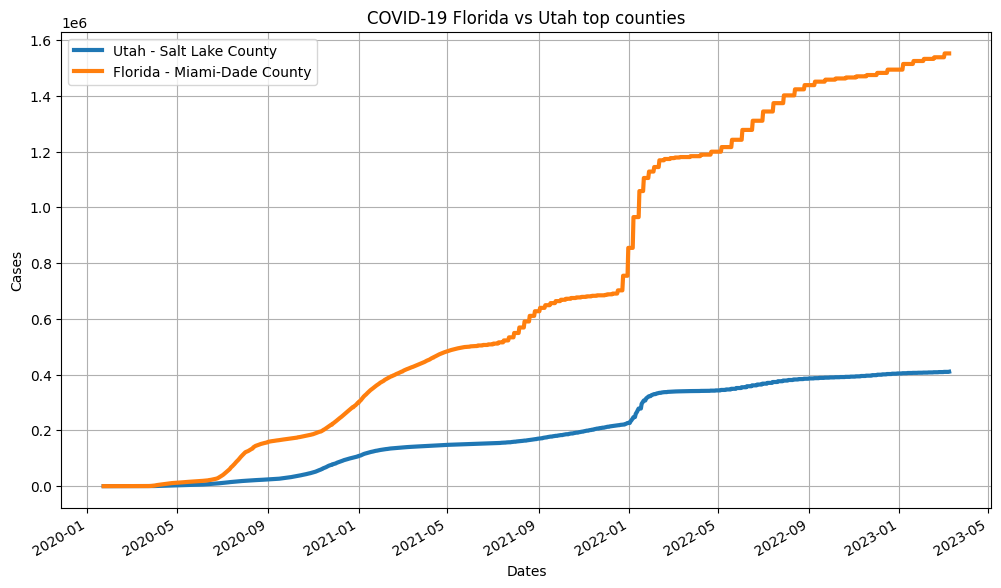

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

#Identify Utah's top county
utah_df = covid_df[covid_df['Province_State'] == 'Utah']
date_cols = utah_df.columns[11:]

utah_top_county = utah_df.loc[utah_df[date_cols].sum(axis = 1).idxmax(), 'Admin2']

#Identify Florida's top county
fl_df = covid_df[covid_df['Province_State'] == 'Florida']
fl_top_county = fl_df.loc[fl_df[date_cols].sum(axis = 1).idxmax(), 'Admin2']

#Time-Series
#utah series
utah_series = utah_df[utah_df['Admin2'] == utah_top_county][date_cols].T
utah_series.index = pd.to_datetime(utah_series.index, format = "%m/%d/%y")
utah_series = utah_series.iloc[:, 0]

#florida series
fl_series = fl_df[fl_df['Admin2'] == fl_top_county][date_cols].T
fl_series.index = pd.to_datetime(fl_series.index, format = "%m/%d/%y")
fl_series = fl_series.iloc[:, 0]

#plot
plt.figure(figsize = (12, 7))
plt.plot(
    utah_series.index,
    utah_series.values,
    linewidth = 3,
    label = f"Utah - {utah_top_county} County",
)
plt.plot(
    fl_series.index,
    fl_series.values,
    linewidth = 3,
    label = f"Florida - {fl_top_county} County",
)

plt.title("COVID-19 Florida vs Utah top counties")
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()

plt.show()

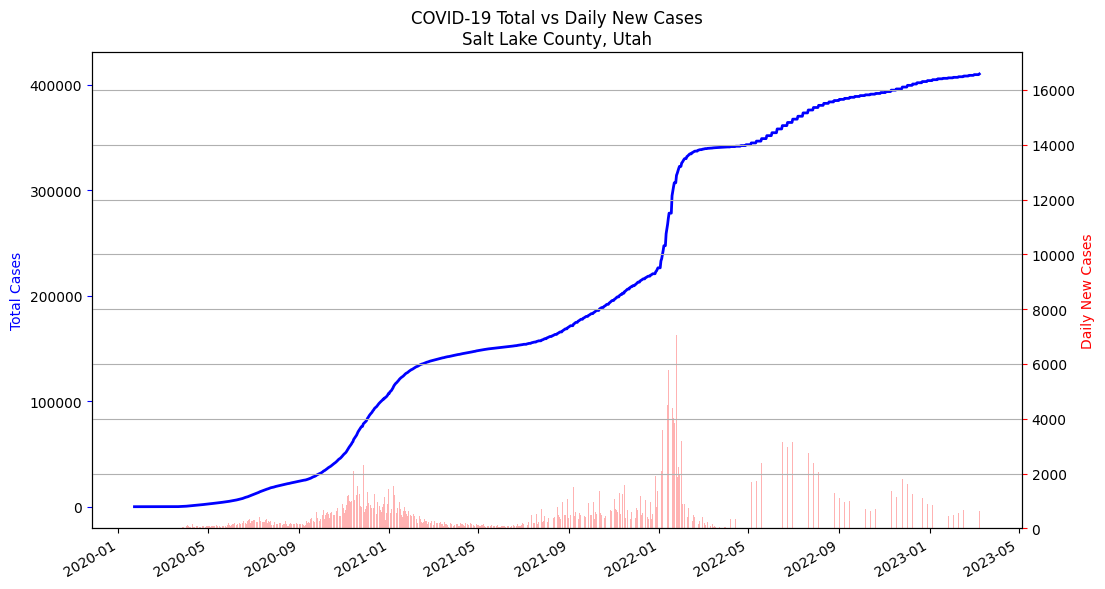

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

#State and county
state = 'Utah'
county = 'Salt Lake'

df = covid_df[(covid_df['Province_State'] == state) &
              (covid_df['Admin2'] == county)]

#extract date columns
date_cols = df.columns[11:]

#total time series
ts = df[date_cols].T
ts.index = pd.to_datetime(ts.index, format = "%m/%d/%y")
ts = ts.iloc[:, 0]

#daily new cases
daily_new = ts.diff().fillna(0)
#plot with two axis
fig, ax1 = plt.subplots(figsize = (12, 7))

#total on left axis
ax1.plot(ts.index, ts.values, color = 'Blue', linewidth = 2, label = 'Total Cases')
ax1.set_ylabel('Total Cases', color = 'Blue')
ax1.tick_params(axis = 'y', color = 'Blue')

#daily on 2nd axis
ax2 = ax1.twinx()
ax2.bar(daily_new.index, daily_new.values,
        alpha = 0.3, color = 'Red', label = 'Daily New Cases')
ax2.set_ylabel('Daily New Cases', color = 'Red')
ax2.tick_params(axis = 'y', color = 'Red')

plt.title(f"COVID-19 Total vs Daily New Cases\n{county} County, {state}")
fig.autofmt_xdate()

plt.grid(True)
plt.show()

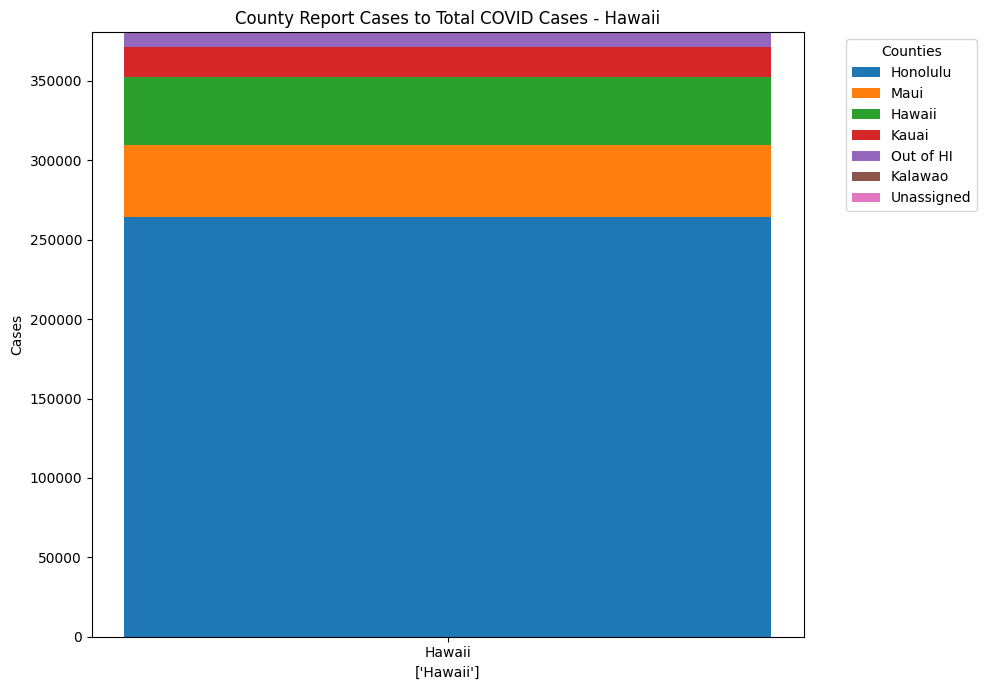

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

state = 'Hawaii'

state_df = covid_df[covid_df['Province_State'] == state]

date_cols = state_df.columns[11:]
#Find total cases by each county
latest_date_col = date_cols[-1]
county_totals = state_df[['Admin2', latest_date_col]].set_index('Admin2')

#sort counties by size
county_totals = county_totals.sort_values(latest_date_col, ascending = False)

#plot
plt.figure(figsize = (10, 7))

bottom_hieght = 0

for county, row in county_totals.iterrows():
    cases = row[latest_date_col]
    plt.bar(
        state,
        cases,
        bottom = bottom_hieght,
        label = county
    )
    bottom_hieght += cases

#Title and labels
plt.title(f"County Report Cases to Total COVID Cases - {state}")
plt.ylabel('Cases')
plt.xlabel([state])

plt.legend(
    title = 'Counties',
    bbox_to_anchor = (1.05, 1),
    loc = 'upper left'
)

plt.tight_layout()
plt.show()